In this week, I will be working on credit risk scoring project. 

*Imagine if a customer wishes to take a loan from the bank. This customer will fill out some basic information about them such as basic income, experience etc. The customer will apply for the loan with this application and the bank will decide based on the information provided by the customer if or not to loan them money.The bank will use the information provided by the customer and their application will be assessed to check how much money to loan them. The bank will assess the probability of the customer not paying back which is called as 'Risk of Default'.*

+ This problem can be built in a model with all customer data including their application. This information of the customers is used by the bank to assess their risk of default i.e., assessing whether this customer will be able to pay back the loan or whether they will default.

+ This is a binary classification problem. Where 

    + $y_{i}$ ∈ {0,1} , where 0 is OK that customer will pay back the loan and 1 is the case when customer is defaulted.

+ Our aim is to train a ml model which will provide the probability if this customer will default or not. Thus, a new customer  $g(x_{i})$ -> probability of default. In this example, X is our feature matrix containing customer information, y is the target variable.


### Decision Trees
+ Decision Tree is a classification algorithm.
+ it uses classification rule which starts from the root of and goes to the leaf nodes.
+ Where each node represents a test on features of the model. For example, if a node presents job feature of the customer then it's two ends will be if the job is part-time or not. If the job is part-time, the customer will default otherwise.

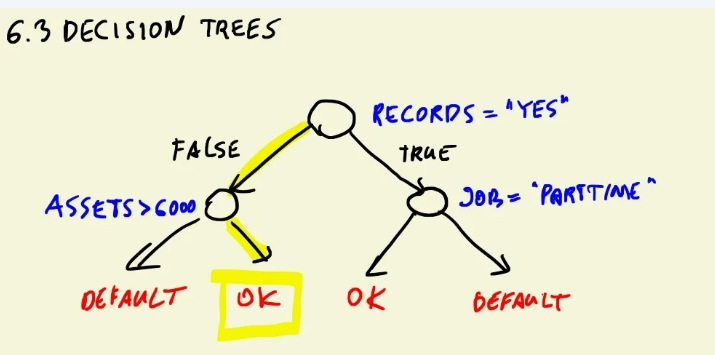

In [1]:
# import libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Downloading the dataset 

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

In [3]:
!wget $data

--2022-10-17 10:29:48--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: 'CreditScoring.csv.8'

     0K .......... .......... .......... .......... .......... 28%  314K 0s
    50K .......... .......... .......... .......... .......... 56%  207K 0s
   100K .......... .......... .......... .......... .......... 84%  528K 0s
   150K .......... .......... ........                        100% 1,03M=0,5s

2022-10-17 10:29:49 (342 KB/s) - 'CreditScoring.csv.8' saved [182489/182489]



In [4]:
# head command provides first 10 rows of the dataset
!head CreditScoring.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
df = pd.read_csv(data)

In [6]:
df.head()

Status  Seniority  Home  Time  Age  Marital  Records  Job  Expenses  \
0       1          9     1    60   30        2        1    3        73   
1       1         17     1    60   58        3        1    1        48   
2       2         10     2    36   46        2        2    3        90   
3       1          0     1    60   24        1        1    1        63   
4       1          0     1    36   26        1        1    1        46   

   Income  Assets  Debt  Amount  Price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

Some of the categorical variables are coded as numbers. For example, Status, Marital, home, records, and job
We want to understand what 2,3 in the Marital column means?

In [7]:
#lower-case the column names
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

To understand the categorical variables :
This r script provides an overview how categorical variables are coded:https://github.com/gastonstat/CreditScoring/blob/master/Part1_CredScoring_Processing.R
For example, missing values are coded as 99999999. From the R code, this is how categorical variable are formatted:
change factor levels (i.e. categories)
levels(df$Status) = c("good", "bad")
levels(df$Home) = c("rent", "owner", "priv", "ignore", "parents", "other")
levels(df$Marital) = c("single", "married", "widow", "separated", "divorced")
levels(df$Records) = c("no_rec", "yes_rec")
levels(df$Job) = c("fixed", "partime", "freelance", "others")
in R indices start with 1.That means 1 is "good" and 2 is "bad"
Let's translate this R code into Python

# Re-encoding the categorical variables

In [8]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

Translating these numbers into strings using the function map().
Python's map() is a built-in function that allows to process and transform all the items in an iterable without using an explicit for loop, a technique commonly known as mapping. 
map() is useful when you need to apply a transformation function to each item in an iterable and transform them into a new iterable.

In [9]:
df.status.map({1:'ok', 2:'default',0:'unk'})

0            ok
1            ok
2       default
3            ok
4            ok
         ...   
4450    default
4451         ok
4452    default
4453         ok
4454         ok
Name: status, Length: 4455, dtype: object

In [10]:
status_values = {
    1:'ok', 
    2:'default',
    0:'unk'
}

df.status = df.status.map(status_values)

In [11]:
# now using the same code for  Marital, home, records, and job
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [12]:
df.head()
#'status' variable has been transformed to a categorical variable (a string)

status  seniority   home  time  age  marital records        job  expenses  \
0       ok          9   rent    60   30  married      no  freelance        73   
1       ok         17   rent    60   58    widow      no      fixed        48   
2  default         10  owner    36   46  married     yes  freelance        90   
3       ok          0   rent    60   24   single      no      fixed        63   
4       ok          0   rent    36   26   single      no      fixed        46   

   income  assets  debt  amount  price  
0     129       0     0     800    846  
1     131       0     0    1000   1658  
2     200    3000     0    2000   2985  
3     182    2500     0     900   1325  
4     107       0     0     310    910

In [13]:
# before dealing with missing values, let's look at the descriptive statistics of the data
df.describe().round()
# varibles 'income', 'assessts', and 'debt' has large values (99999999.0)

seniority    time     age  expenses      income      assets  \
count     4455.0  4455.0  4455.0    4455.0      4455.0      4455.0   
mean         8.0    46.0    37.0      56.0    763317.0   1060341.0   
std          8.0    15.0    11.0      20.0   8703625.0  10217569.0   
min          0.0     6.0    18.0      35.0         0.0         0.0   
25%          2.0    36.0    28.0      35.0        80.0         0.0   
50%          5.0    48.0    36.0      51.0       120.0      3500.0   
75%         12.0    60.0    45.0      72.0       166.0      6000.0   
max         48.0    72.0    68.0     180.0  99999999.0  99999999.0   

             debt  amount    price  
count      4455.0  4455.0   4455.0  
mean     404382.0  1039.0   1463.0  
std     6344253.0   475.0    628.0  
min           0.0   100.0    105.0  
25%           0.0   700.0   1118.0  
50%           0.0  1000.0   1400.0  
75%           0.0  1300.0   1692.0  
max    99999999.0  5000.0  11140.0

In [14]:
df.income.max()

99999999

In [15]:
#replace the large values (99999999.0) with NA's
df.income.replace(to_replace=99999999, value=np.nan)

0       129.0
1       131.0
2       200.0
3       182.0
4       107.0
        ...  
4450     92.0
4451     75.0
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [16]:
# check the maximum value again
df.income.replace(to_replace=99999999, value=np.nan). max()
# and it is not a large value anymore

959.0

In [17]:
# we can perfrom the above opetation in a loop for three columns (income, assets, debt) with large values
for c in ['assets','debt']:
    df[c]=df[c].replace(to_replace=99999999, value=np.nan)

In [18]:
df.describe().round()

seniority    time     age  expenses      income    assets     debt  \
count     4455.0  4455.0  4455.0    4455.0      4455.0    4408.0   4437.0   
mean         8.0    46.0    37.0      56.0    763317.0    5403.0    343.0   
std          8.0    15.0    11.0      20.0   8703625.0   11573.0   1246.0   
min          0.0     6.0    18.0      35.0         0.0       0.0      0.0   
25%          2.0    36.0    28.0      35.0        80.0       0.0      0.0   
50%          5.0    48.0    36.0      51.0       120.0    3000.0      0.0   
75%         12.0    60.0    45.0      72.0       166.0    6000.0      0.0   
max         48.0    72.0    68.0     180.0  99999999.0  300000.0  30000.0   

       amount    price  
count  4455.0   4455.0  
mean   1039.0   1463.0  
std     475.0    628.0  
min     100.0    105.0  
25%     700.0   1118.0  
50%    1000.0   1400.0  
75%    1300.0   1692.0  
max    5000.0  11140.0

In [19]:
# Previously we saw that the variable 'status' has an unknown value
df.status.value_counts()
# but we are interested in whether customer is defaulted 

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [20]:
# let' filter the data which is not unknwon
df = df[df.status != 'unk'].reset_index(drop=True)

# Doing the train/validation/test split 

In [21]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
# defining target variable
# because we re-encoded 'ok', and 'default' variables, now we will code them again into numbers
y_train = (df_train.status == 'default').astype('int').values # converting 'default' into 1(True) otherwise 0(False)
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [24]:
# removing default variables from the default dataframes
del df_train['status']
del df_val['status']
del df_test['status']

In [25]:
df_train

seniority     home  time  age  marital records        job  expenses  \
0            10    owner    36   36  married      no  freelance        75   
1             6  parents    48   32   single     yes      fixed        35   
2             1  parents    48   40  married      no      fixed        75   
3             1  parents    48   23   single      no    partime        35   
4             5    owner    36   46  married      no  freelance        60   
...         ...      ...   ...  ...      ...     ...        ...       ...   
2667         18  private    36   45  married      no      fixed        45   
2668          7  private    60   29  married      no      fixed        60   
2669          1  parents    24   19   single      no      fixed        35   
2670         15    owner    48   43  married      no  freelance        60   
2671         12    owner    48   27  married     yes      fixed        45   

      income   assets    debt  amount  price  
0          0  10000.0     0.0    1000   1400  
1         85      0.0     0.0    1100   1330  
2        121      0.0     0.0    1320   1600  
3         72      0.0     0.0    1078   1079  
4        100   4000.0     0.0    1100   1897  
...      ...      ...     ...     ...    ...  
2667     220  20000.0     0.0     800   1600  
2668      51   3500.0   500.0    1000   1290  
2669      28      0.0     0.0     400    600  
2670     100  18000.0     0.0    2500   2976  
2671     110   5000.0  1300.0     450   1636  

[2672 rows x 13 columns]

# Decision Trees

In [26]:
# creating a function which is implementing a decision tree in credit scoring data
# if and else condition: if a customer has a part-time job then they might 'default' else the case is 'ok' 
# second case, if customer has assessts then they will be 'ok', otherwise 'default'

def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [27]:
# turning first record of the train dataset into dictionary
df_train.iloc[0].to_dict()
# we can see that the job doesn't fall in our criteria of the decision tree

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [28]:
xi = df_train.iloc[0].to_dict()

In [29]:
assess_risk(xi)
# the job with freelance description shows that this customer will be fine. They will not default.

'ok'

In [30]:
xi # becasue they have 10000 assets that's why this customer is 'ok'

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [31]:
# The rules encoded above can be learned from data using decision tree algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [32]:
# Now we will turn our data frame into list of dictionaries and then turn them into feature matrix and then train the model
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [33]:
train_dicts[:5]

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'marital':

In [34]:
#training dictionary vectoriser
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [35]:
X_train
# this is our feature matrix

array([[3.60e+01, 1.00e+03, 1.00e+04, ..., 0.00e+00, 1.00e+01, 3.60e+01],
       [3.20e+01, 1.10e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 4.80e+01],
       [4.00e+01, 1.32e+03, 0.00e+00, ..., 0.00e+00, 1.00e+00, 4.80e+01],
       ...,
       [1.90e+01, 4.00e+02, 0.00e+00, ..., 0.00e+00, 1.00e+00, 2.40e+01],
       [4.30e+01, 2.50e+03, 1.80e+04, ..., 0.00e+00, 1.50e+01, 4.80e+01],
       [2.70e+01, 4.50e+02, 5.00e+03, ..., 1.00e+00, 1.20e+01, 4.80e+01]])

In [36]:
# looking at the feature names
dv.get_feature_names()
# as we can see that all numerical features are left intact and our categorical variables are encoded

C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [37]:
# training our decision tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# intially it gives an error due to Nan values. Therefore, we will fillna with 0 in train_dicts

DecisionTreeClassifier()

In [38]:
#let's test the validation dataset
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [39]:
y_pred = dt.predict_proba(X_val)[:,1] #first column , the probability of customer beloning to the positive class

In [40]:
# calculating AUC
roc_auc_score(y_val,y_pred)
# not the best AUC score

0.6448469400111404

In [41]:
# let's see what is the AUC score for the training data
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred)


1.0

## Overfitting

+ The AUC is 0.63 on the validation data and 1 on the training data, this case is known as OVERFITTING
**OVERFITTING is when our model simply memorises the data in such a way that when it sees a new example and doesn't know how to deal with this example becasue it doesn't look like any of the memorized data points**
+ Thus, the model memorizes the data but fails to generalize because for new unseen examples none of the memorized examples look like this new one and the output is completely incorrect
+ The reason of overfitting in this case is because the depth of our tree is high. 
+ Thus, if we let out tree grow very deep i.e., if the nodes are deep and model learns any possible combinations, this way our model suffers from overfitting.
+ We can try now to restrict the depth of the tree and rearrange the code a bit to overcome the problem of overfitting

In [42]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [43]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print('val:', auc)

# we see that after restricting the depth of the tree, the performance of the model on the vslidation set is significantly better

train: 0.7727018900343643
val: 0.7376244217868301


Thus, by not letting tree grow any deeper, we achieve better performance
+ If we restrict the depth of the tree to only one, this kind of tree is called as **decision stamp**

In [44]:
dt=DecisionTreeClassifier(max_depth=1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1)

In [45]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print('val:', auc)

train: 0.6282660131823559
val: 0.6058644740984719


In [46]:
# we can visualise tees and see what functions it has learnt
from sklearn.tree import export_text

In [47]:
print(export_text(dt, feature_names=dv.get_feature_names())) # to check the feature names

|--- records=yes <= 0.50
|   |--- class: 0
|--- records=yes >  0.50
|   |--- class: 1



C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [48]:
#decision tree with two levels
dt=DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [49]:
y_pred = dt.predict_proba(X_train)[:,1]
auc = roc_auc_score(y_train,y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val,y_pred)
print('val:', auc)

train: 0.7054989859726213
val: 0.6685264343319367


In [50]:
print(export_text(dt, feature_names=dv.get_feature_names())) # to check the feature names

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Thus, we learned that the AUC of a simple decision tree is better than the AUC of the tree which we let grow into many layers.

## Decision Tree learning algorithm

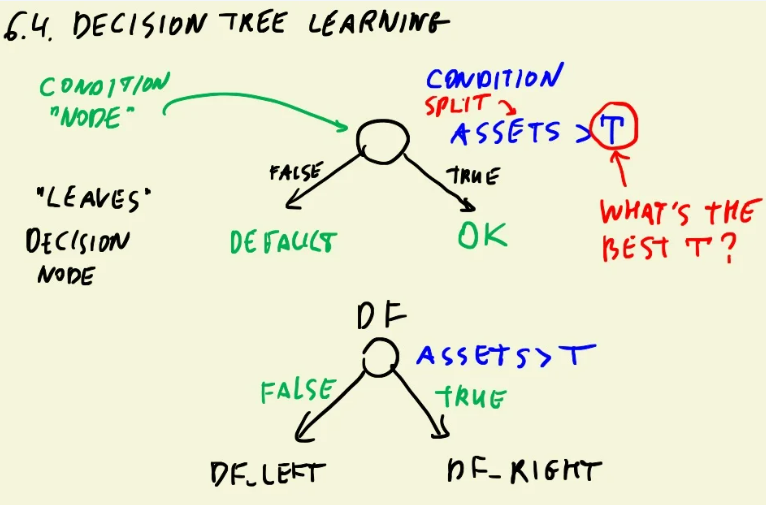

In [51]:
# in this dataset, first column is asset and the second column is the status
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

In [52]:
df_example.sort_values('assets')

assets   status
2       0  default
1    2000  default
7    3000  default
5    4000       ok
3    5000       ok
4    5000       ok
0    8000  default
6    9000       ok

In [53]:
# setting up potential thresholds 
Ts = [0, 2000, 3000, 4000, 5000, 8000]


In [54]:
# we will cut our datset into left & right nodes and see which one is the best
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left.status.value_counts(normalize=True))
display(df_right)
print(df_left.status.value_counts(normalize=True))

assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

default    0.75
ok         0.25
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

default    0.75
ok         0.25
Name: status, dtype: float64


If we split our dataset into two parts with threshold > 4000:
    + True -> prediction OK because 3 out of four of the clients are OK
    + False -> prediction is default as 3 out of four are defaulting 
    
*Misclassification rate: Misclassification rate can be used to check how good the predictions are. It is the fraction of errors. How many errors have been made. For example, in False node, if he prediction was default and one Okay, then the misclassification rate will be 1/4 = 25%.* Thus, misclassification can be used to assess the quality of the tree split. Our aim is to keep the leaves as pure as possible. Thus, misclassification rate informs us how impure they are.

    + The misclassification rate for the right node will be 1/4  25% as the prediction was 3 Ok and 1 default. 
    + Impurity can be calculated as the total amount of errors divided by the total population.
    + 
+ 

#### calculating impurity or misclassification rate for each threshold

In [55]:
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    
    print()

0


assets   status
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


assets   status
1    2000  default
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


assets   status
1    2000  default
2       0  default
7    3000  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok

ok         0.8
default    0.2
Name: status, dtype: float64

4000


assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

default    0.75
ok         0.25
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

ok         0.75
default    0.25
Name: status, dtype: float64

5000


assets   status
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.5
ok         0.5
Name: status, dtype: float64


assets   status
0    8000  default
6    9000       ok

default    0.5
ok         0.5
Name: status, dtype: float64

8000


assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.571429
ok         0.428571
Name: status, dtype: float64


assets status
6    9000     ok

ok    1.0
Name: status, dtype: float64



|| Threshold | Decision left | Impurity left | Decision right | Impurity right | Average |
| --- :|:---------- :|:------------- :|:

### make table here

The best split here is 3000 as the average was the lowest

In [56]:
# now we eill repeat same with other fratures
thresholds = {
    'assets':[0,2000,3000,4000,5000,8000],
    'debt': [500,1000,2000]
}

In [57]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example.assets <= T]
        df_right = df_example[df_example.assets > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
    
        print()
    print('######################')   

#####################
assets
0


assets   status
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


assets   status
1    2000  default
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64

3000


assets   status
1    2000  default
2       0  default
7    3000  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok

ok         0.8
default    0.2
Name: status, dtype: float64

4000


assets   status
1    2000  default
2       0  default
5    4000       ok
7    3000  default

default    0.75
ok         0.25
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
6    9000       ok

ok         0.75
default    0.25
Name: status, dtype: float64

5000


assets   status
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.5
ok         0.5
Name: status, dtype: float64


assets   status
0    8000  default
6    9000       ok

default    0.5
ok         0.5
Name: status, dtype: float64

8000


assets   status
0    8000  default
1    2000  default
2       0  default
3    5000       ok
4    5000       ok
5    4000       ok
7    3000  default

default    0.571429
ok         0.428571
Name: status, dtype: float64


assets status
6    9000     ok

ok    1.0
Name: status, dtype: float64

######################
#####################
debt
500


assets   status
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64

1000


assets   status
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.571429
default    0.428571
Name: status, dtype: float64

2000


assets   status
1    2000  default
2       0  default

default    1.0
Name: status, dtype: float64


assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default

ok         0.666667
default    0.333333
Name: status, dtype: float64

######################


This can continue for additional features. In case of additional features, we will create decision tables with all possible thresholds and impurities.
The feature with lowest impurity will be more useful.

for f in features:
    find all thresholds for f
    for t in thresholds:
        split dataset using "f > t" condition
        compute impurity of this split
select condition with lowest impurity

However, we need a stopping criteria as if we go deeper in he nodes, this  could easily lead to overfitting.
The criteria for stopping are:

+ If the group is already pure
+ if the tree has reached its depth limit
+ if group is too small for splitting

find the best split
stop if the max depth has been reached
if left leaf is large enough and not pure:
    repeat for left
if right lead is large enough and not pure:
    repeat for right

#### Steps for decision tree learning algorithm
+ find the best split by going over available features and thresholds
+ Make sure maximum depth of the tree has reached and then it's time to stop the split to avoid overfitting
+ If the max_depth has not reached, then check if the left leaf is large enough and has low impurity
+ but if left leaf is sufficiently large and not pure then we will repeat the same algorithm for the left leaf
+ This is repeated for the right leaf as well, if the right leaf is large enough and not pure then we repeat the same algorithm for the right leaf.


## Decision trees parameter tuning

In [58]:
from sklearn.metrics import roc_auc_score

In [59]:
# We will use  metric here and our aim would be to find the maximum AUC on applied on the validation set
depths = [1,2,3,4,5,6,10,15,20,None]

for depth in depths: # none means no restriction, this tree show grow as deep as possible
# we already know what happens when the tree keeps growing deeper
# but this none is for comparison

    dt = DecisionTreeClassifier(max_depth = depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth,auc))


# the important arguments in this function:
# max_depth = controls the size of the tree
# min_samples_leaf or decision leaf= total number of obeservations & samples we want to have in each leaf
# min_samples_leaf controls the size of the leaf
# this node is where model decides if the decision is going to be OK or deafult
# we will first try to find the best max_depth

   1 -> 0.606
   2 -> 0.669
   3 -> 0.738
   4 -> 0.759
   5 -> 0.767
   6 -> 0.733
  10 -> 0.661
  15 -> 0.648
  20 -> 0.632
None -> 0.631


In [60]:
# the best max_depth values are somewhere in between 3 & 5
# try each of these values, try different min_samples_leaf values

scores =[]
for d in[4,5,6]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt= DecisionTreeClassifier(max_depth=d,min_samples_leaf = s)
        dt.fit(X_train,y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        #print('(%4s , %3d) -> %.3f' % (d,s,auc))
        scores.append((d,s,auc))
        

In [61]:
# put this in df for easy visualisation
columns = ['max_depth','min_samples_leaf','auc']
df_scores =pd.DataFrame(scores, columns = columns)
df_scores.head()

max_depth  min_samples_leaf       auc
0          4                 1  0.759424
1          4                 2  0.759424
2          4                 5  0.759424
3          4                10  0.759424
4          4                15  0.763069

In [62]:
# sorting auc values
df_scores.sort_values(by='auc',ascending=False)

max_depth  min_samples_leaf       auc
24          6               100  0.768687
22          6                15  0.768539
9           5                 1  0.767050
10          5                 2  0.767050
11          5                 5  0.766686
25          6               200  0.765863
14          5                20  0.764413
13          5                15  0.763783
4           4                15  0.763069
15          5               100  0.762615
23          6                20  0.761186
12          5                10  0.760786
5           4                20  0.760326
0           4                 1  0.759424
1           4                 2  0.759424
3           4                10  0.759424
2           4                 5  0.759424
16          5               200  0.756890
21          6                10  0.756388
20          6                 5  0.754862
6           4               100  0.754078
18          6                 1  0.745744
7           4               200  0.745405
19          6                 2  0.743894
8           4               500  0.679140
17          5               500  0.679140
26          6               500  0.679140

In [63]:
# Pivot
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                 columns=['max_depth'], values =['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.759  0.767  0.746
2                 0.759  0.767  0.744
5                 0.759  0.767  0.755
10                0.759  0.761  0.756
15                0.763  0.764  0.769
20                0.760  0.764  0.761
100               0.754  0.763  0.769
200               0.745  0.757  0.766
500               0.679  0.679  0.679

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

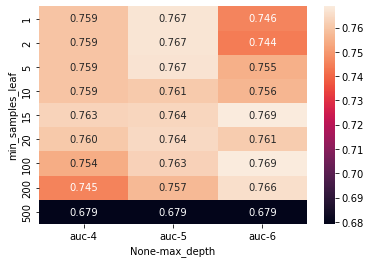

In [64]:
# visualise it using heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

+ The way of selecting a parameter could be sub-optimal
+ The best max_depth values could be the highest
+ maybe the highest value of max_depth works better

In [65]:
# the best max_depth values are somewhere in between 3 & 5
# try each of these values, try different min_samples_leaf values

scores =[]
for d in[4,5,6,7,10,15,20,None]:
    for s in [1,2,5,10,15,20,100,200,500]:
        dt= DecisionTreeClassifier(max_depth=d,min_samples_leaf = s)
        dt.fit(X_train,y_train)
        
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val,y_pred)
        
        #print('(%4s , %3d) -> %.3f' % (d,s,auc))
        scores.append((d,s,auc))
        

In [66]:
columns = ['max_depth','min_samples_leaf','auc']
df_scores =pd.DataFrame(scores, columns = columns)
df_scores.head()

max_depth  min_samples_leaf       auc
0        4.0                 1  0.759424
1        4.0                 2  0.759424
2        4.0                 5  0.759424
3        4.0                10  0.759424
4        4.0                15  0.763069

In [67]:
# sorting auc values
df_scores.sort_values(by='auc',ascending=False)

max_depth  min_samples_leaf       auc
40       10.0                15  0.787012
49       15.0                15  0.783588
58       20.0                15  0.783424
50       15.0                20  0.782952
67        NaN                15  0.782362
..        ...               ...       ...
64        NaN                 2  0.667328
36       10.0                 1  0.663410
54       20.0                 1  0.651477
63        NaN                 1  0.644181
45       15.0                 1  0.643751

[72 rows x 3 columns]

+ Here we tried only two parameters, and it's difficult to try every other value with many other parameters
+ Thus, it's a preference to first find out the best values of max_depth and decision leaf parameters

In [68]:
# Pivot
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                                 columns=['max_depth'], values =['auc'])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.644  0.759  0.767  0.745  0.732  0.663  0.644  0.651
2                 0.667  0.759  0.767  0.744  0.736  0.676  0.683  0.672
5                 0.730  0.759  0.767  0.755  0.745  0.738  0.716  0.726
10                0.752  0.759  0.761  0.756  0.760  0.762  0.753  0.755
15                0.782  0.763  0.764  0.769  0.772  0.787  0.784  0.783
20                0.780  0.760  0.764  0.761  0.765  0.781  0.783  0.781
100               0.775  0.754  0.763  0.769  0.775  0.775  0.775  0.775
200               0.766  0.745  0.757  0.766  0.766  0.766  0.766  0.766
500               0.679  0.679  0.679  0.679  0.679  0.679  0.679  0.679

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

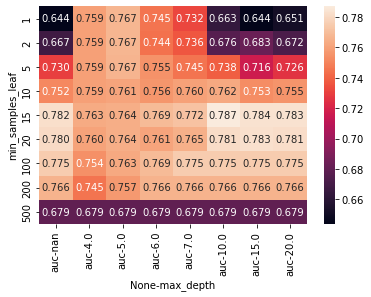

In [69]:
# visualise it using heatmap
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

**Thus, this is how to tune the parameters for the decision trees:**

*first tune the max_depth and then tune the min_samples_leaf*

### final decision tree

In [70]:
# final decision tree
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Ensembles & Random forest
+ A way to put multiple decision tress together
+ Random forest is a collection of different decision trees which have been trained on different features
+ Each of the trained decision tree outputs a prediction and the final prediction is the average of all these predictions
+ Each model gets a random subset of features

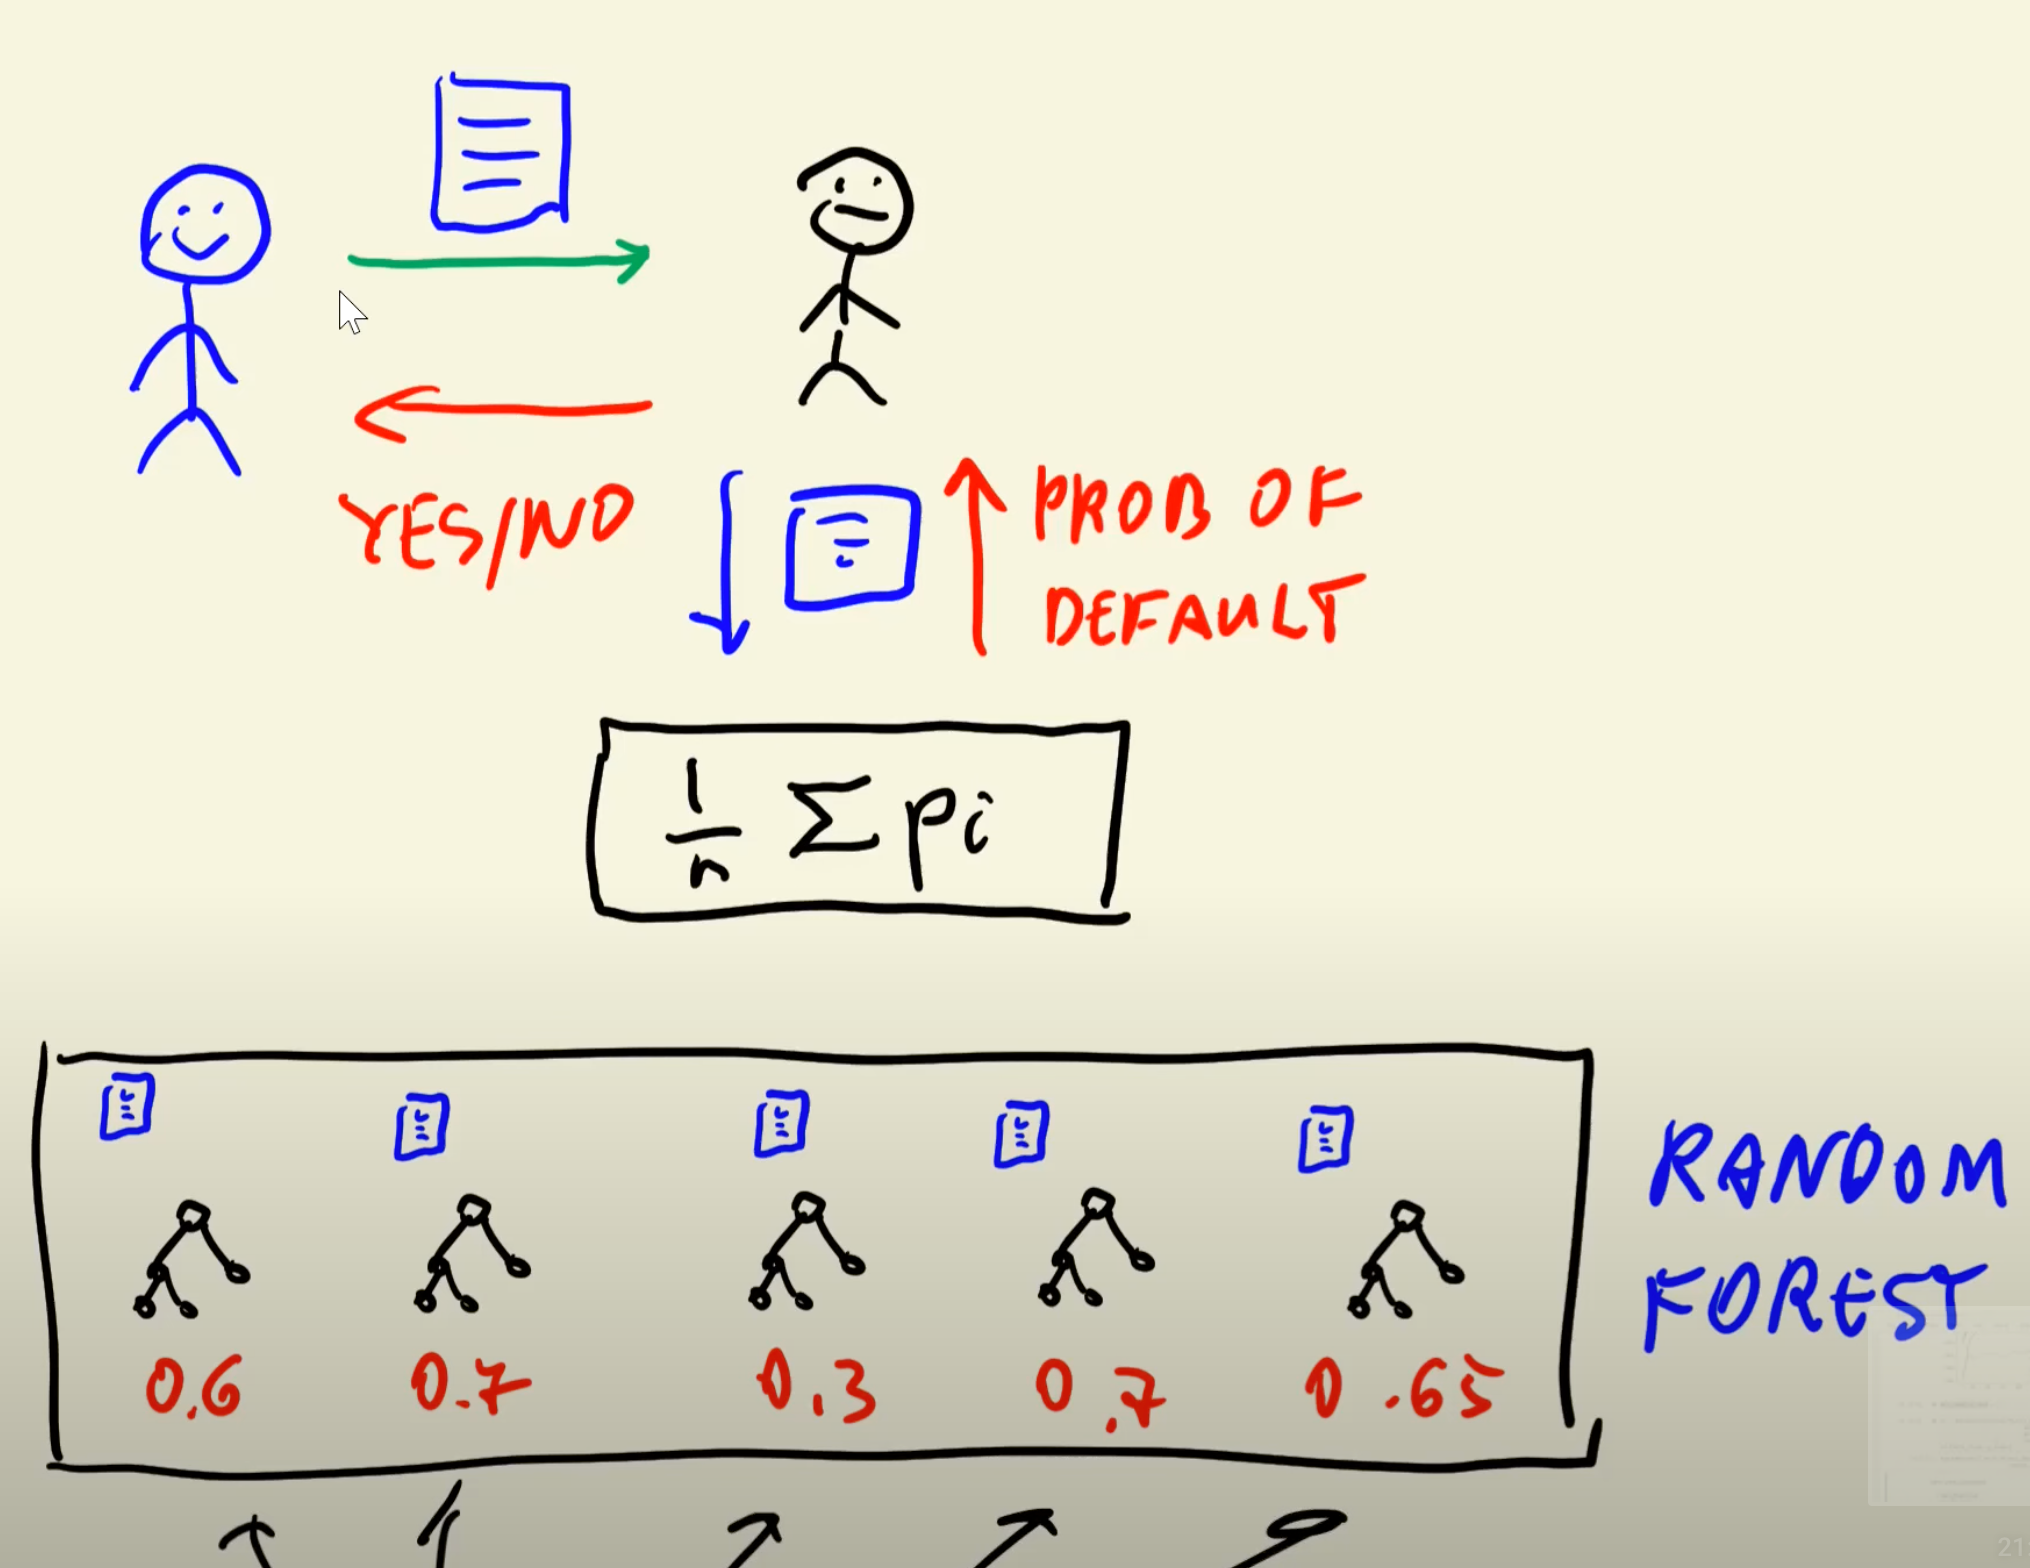

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
# train the model
rf = RandomForestClassifier (n_estimators=10, random_state = 1) # here number of estimator is number of models we want to train
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [73]:
# use trained model for prediction
y_pred = rf.predict_proba(X_val)[:,1]

In [74]:
roc_auc_score(y_val, y_pred) # this is already pretty good without tuning

0.7759560194715556

In [75]:
# checking first row of validation set to see the probability
rf.predict_proba(X_val[[0]])

array([[0.8, 0.2]])

+ Now everytime, if we run the same model, we will get different values of probability
+ Because there are random features that are being included in the model with every run
+ As with every run, tree get random set of features
+ To avoid the randomization,or keep the reproducibility we will fix the random_state =1

In [76]:
# let's check what happens if we increase the n_estimators or number of trees 
# iterate over many different values
scores =[]

for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators = n, random_state = 1)
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n,auc))

In [77]:
# check the scores in df
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])
df_scores

n_estimators       auc
0             10  0.775956
1             20  0.804951
2             30  0.817545
3             40  0.818989
4             50  0.819156
5             60  0.821947
6             70  0.821423
7             80  0.822083
8             90  0.822047
9            100  0.822812
10           110  0.821741
11           120  0.822555
12           130  0.823391
13           140  0.822994
14           150  0.823878
15           160  0.823905
16           170  0.824850
17           180  0.825352
18           190  0.825116
19           200  0.825240

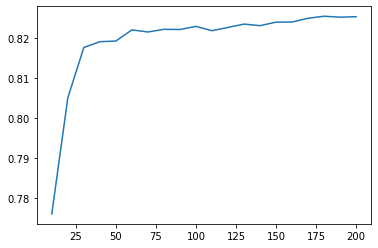

In [78]:
#plot
plt.plot(df_scores.n_estimators, df_scores.auc)

+ This plot shows that the performance of the model stays same after 50 number of tress. Thus, no matter what is the number of trees, after 50 it will stay same
+ But as see there is a rapid increase in the model performance below 25, we can add more models
+ Thus, we will tune the random forest models focusing on min_samples_leaf & max_depth

In [79]:
scores = []

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,n,auc))

In [80]:
columns = ['max_depth','n_estimators','auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

max_depth  n_estimators       auc
0          5            10  0.793478
1          5            20  0.799209
2          5            30  0.800580
3          5            40  0.799657
4          5            50  0.800631

In [81]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label="max_depth %d" %d)
plt.legend()

In [82]:
# here max_depth = 10 seems to be th best one
# now let's find best min_samples_leaf

max_depth = 10
scores = []

for s in [1,3,5,10,50]:
    for n in range (10,201,10):
        rf = RandomForestClassifier (n_estimators=n,
                                    max_depth= max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train,y_train)
        
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s,n,auc))

In [83]:
columns = ['min_samples_leaf','n_estimators','auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

min_samples_leaf  n_estimators       auc
0                 1            10  0.787493
1                 1            20  0.804137
2                 1            30  0.805409
3                 1            40  0.809919
4                 1            50  0.812892

In [84]:
colors = ['black','blue','orange','red','grey']
min_samples_leaf_values = [1,3,5,10,50]
list(zip(min_samples_leaf_values, colors)) # for display we will use zip

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

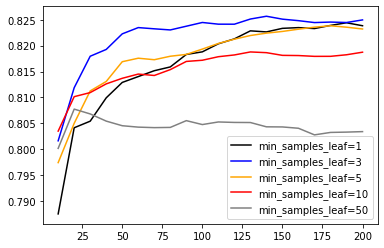

In [85]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()  

### final random forest model

In [86]:
# train model with the best value min_samples_leaf = 3
min_samples_leaf = 3
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

**Summary:**

+ we trained a random forest model
+ we combined multiple models together
+ Thus, random forest is a way to combine multiple decision trees
+ these decision trees need to be different from each other, thus, we perform randomization by selecting different subsets of columns
+ The performance of model depends upon the number of trees and max depth
+ we tuned these two parameters


**🍃The difference between a single #decisiontree & #randomforest **

🍃 #decisiontree is trusted to be trained with the correct features and thresholds 

🍃#randomforest is a collection of different trees that are trained on different feature subsets


### Gradient boosting
+ Another way of combining multiple decision trees into one ensemble
+ The difference between random forest and gradient boosting is the way of combining multiple models into one ensemble which is called as *boosting*
+ Boosting starts with a data set and training the first model. The first model makes the predictions. Then the errors made by the models are assessed. Another model is trained based on these errors. This another model makes predictions again & this new model also makes some errors.
+ The third model corrects the prediction of the second model and this procedure is repeated for many iterations
+ The multiple predictions are then combined into final predictions
+ In summary, Multiple models are sequentially trained and each next model corrects the errors for previous ones
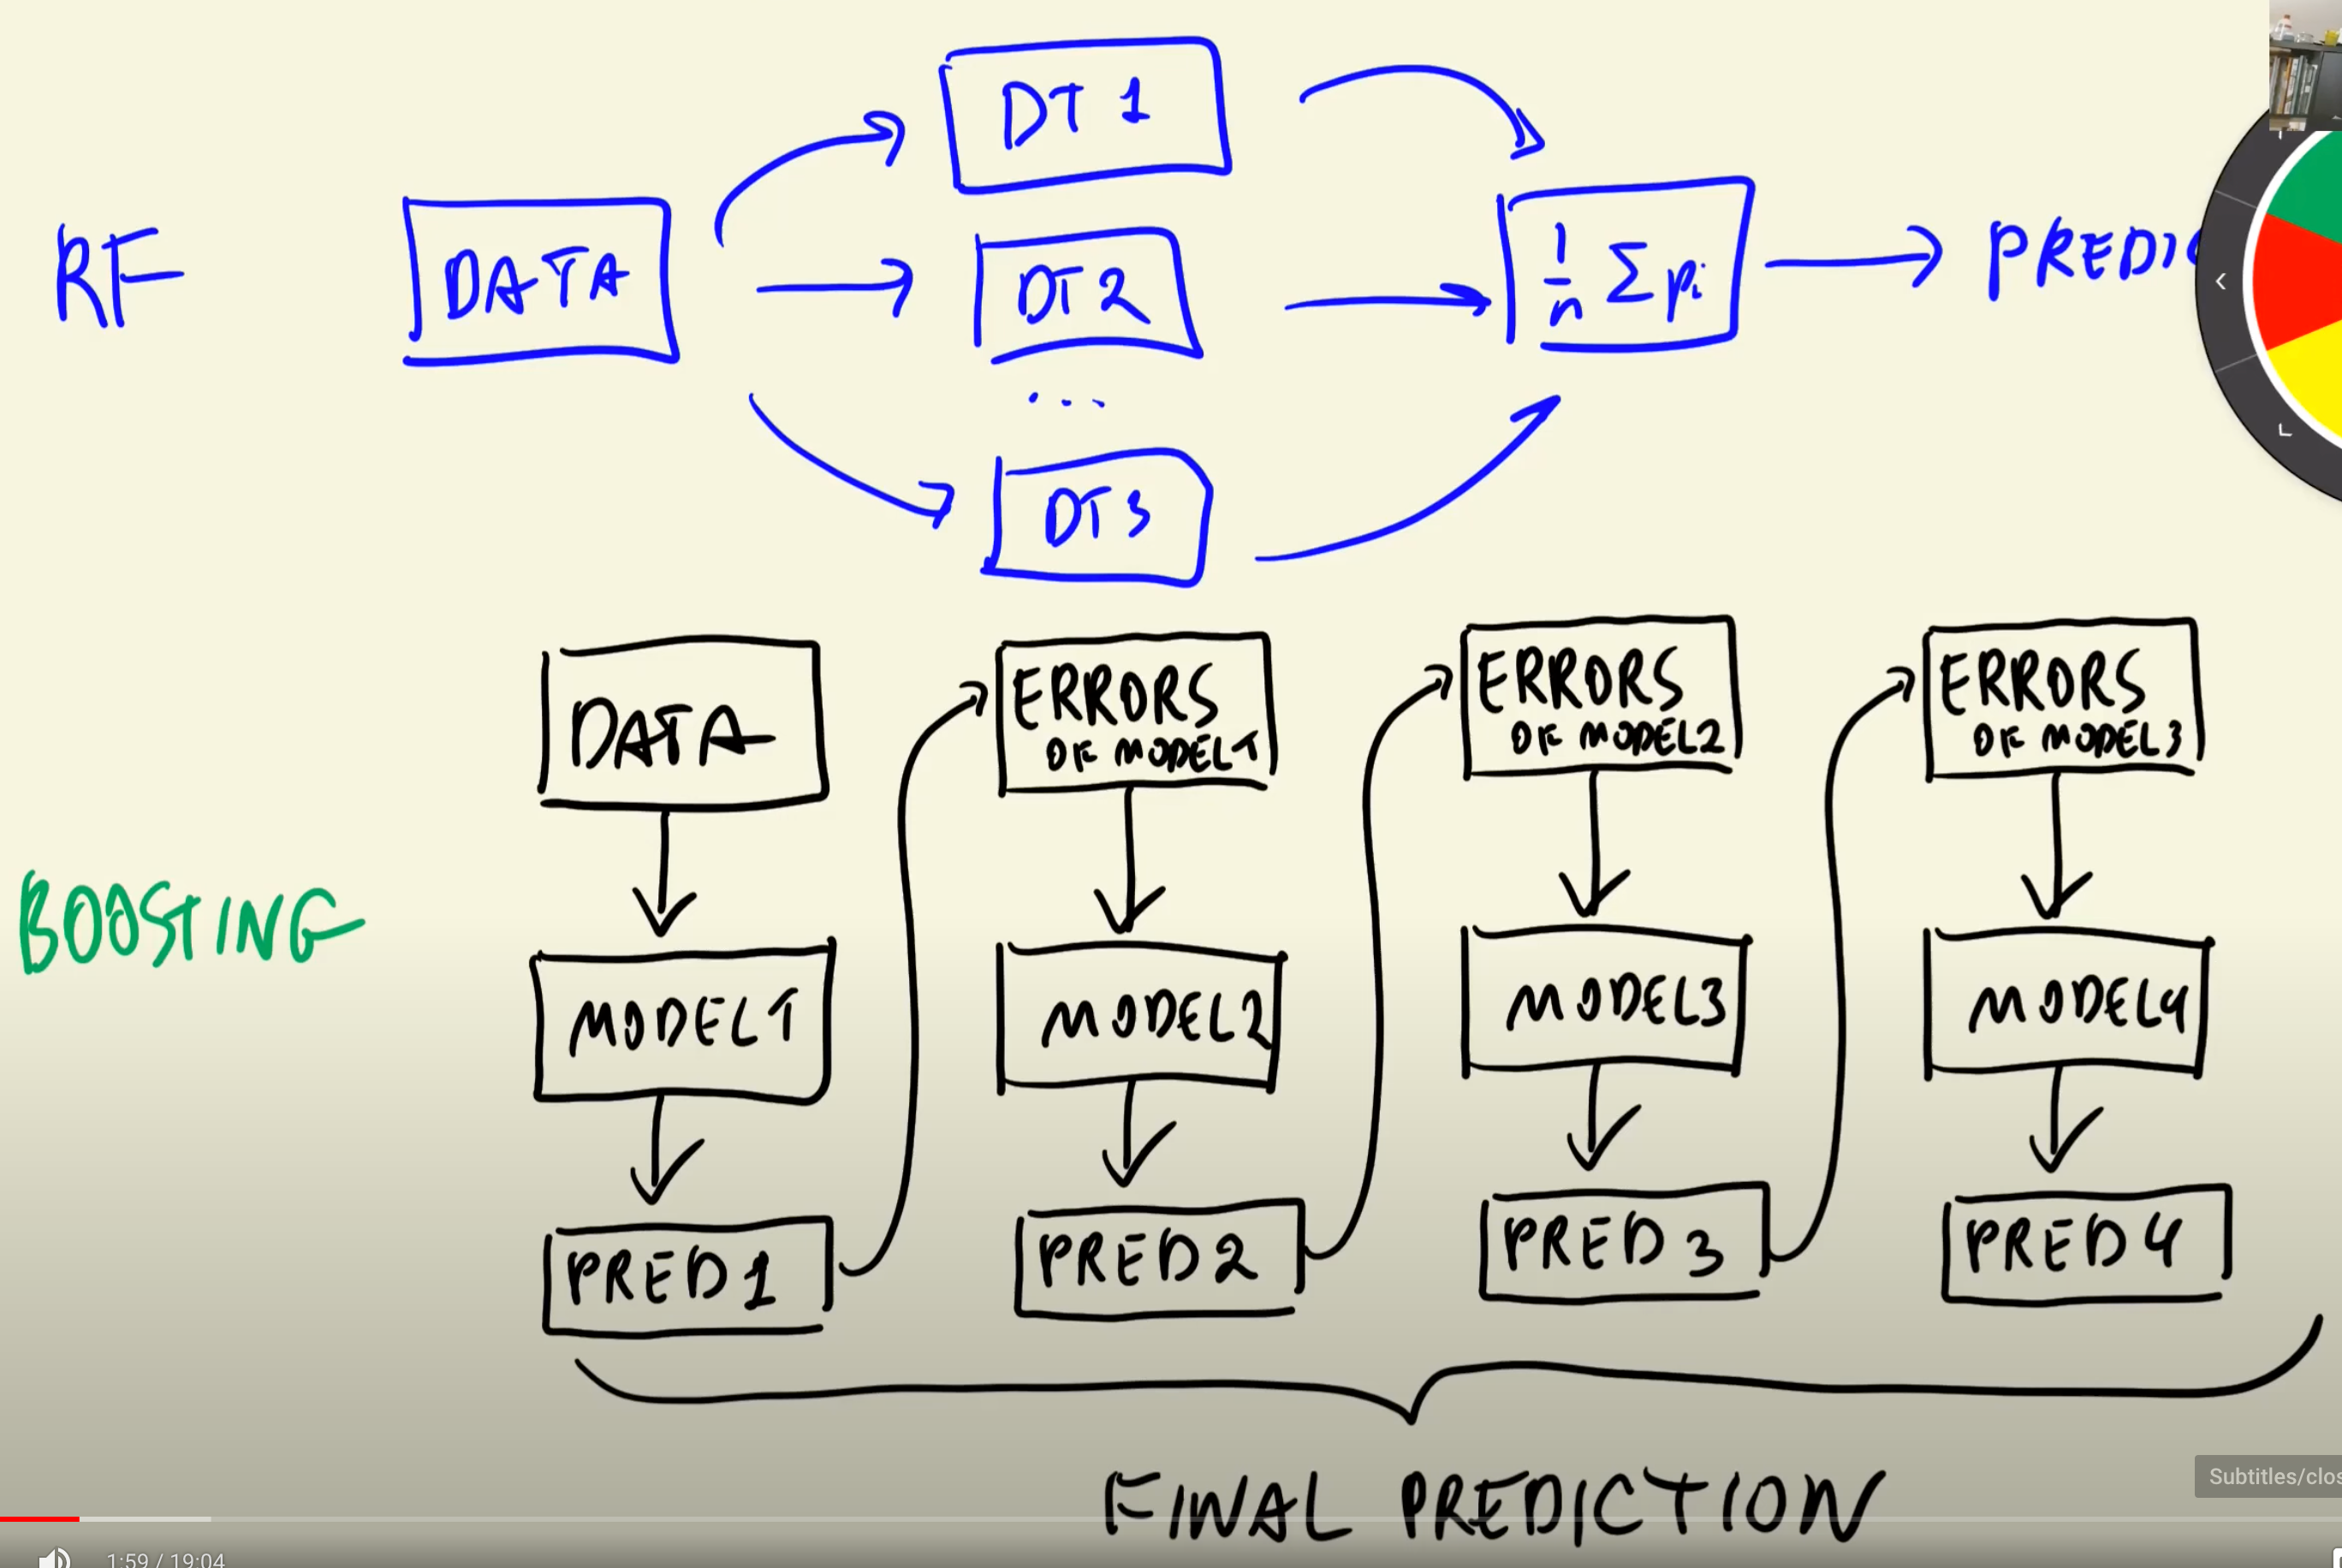

In [87]:
!pip install xgboost

In [88]:
import xgboost as xgb

In [89]:
#passing feature matrix, target variables, and feature names as parameters
#for train set

features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)

# for validation set
dval = xgb.DMatrix(X_val, label=y_val, feature_names= features)

C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [90]:
# training the model using the training feature from xgb
# num_boost_round = 200
# eta = learning rate
# min_child_weight = min samples leaf (how many numbers of observation we should have in leaf node)
# objective = type of problem we are solving, here binary logistic
# verbosity = controls warnings


xgb_params = {
    'eta': 0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'nthread':8,
    
    'seed':1,
    'verbosity':1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)





[10:30:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [91]:
# test this model

y_pred = model.predict(dval)

In [92]:
roc_auc_score(y_val, y_pred)

0.8129071710542249

In [93]:
# it is possible to monitor the performance of the training procedure
# we can see what is happening at each step of training
# this can be done by evaluating validation set after each tree has trained

# create watchlist on which we want to evaluate our models

watchlist = [(dtrain,'train'),(dval,'val')]

In [94]:
xgb_params = {
    'eta': 0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    
    'seed':1,
    'verbosity':1,
}

model = xgb.train(xgb_params, dtrain,
                  verbose_eval=5,
                  evals=watchlist,
                  num_boost_round=200)


[0]	train-auc:0.86287	val-auc:0.76352
[5]	train-auc:0.92756	val-auc:0.81038
[10]	train-auc:0.95366	val-auc:0.81335
[15]	train-auc:0.96526	val-auc:0.81705
[20]	train-auc:0.97391	val-auc:0.81395
[25]	train-auc:0.98103	val-auc:0.81335
[30]	train-auc:0.98676	val-auc:0.81326
[35]	train-auc:0.99098	val-auc:0.80846
[40]	train-auc:0.99363	val-auc:0.80695
[45]	train-auc:0.99606	val-auc:0.80461
[50]	train-auc:0.99749	val-auc:0.80469
[55]	train-auc:0.99819	val-auc:0.80507
[60]	train-auc:0.99878	val-auc:0.80632
[65]	train-auc:0.99943	val-auc:0.80624
[70]	train-auc:0.99967	val-auc:0.80410
[75]	train-auc:0.99980	val-auc:0.80524
[80]	train-auc:0.99991	val-auc:0.80557
[85]	train-auc:0.99996	val-auc:0.80497
[90]	train-auc:0.99999	val-auc:0.80554
[95]	train-auc:0.99999	val-auc:0.80532
[100]	train-auc:1.00000	val-auc:0.80672
[105]	train-auc:1.00000	val-auc:0.80566
[110]	train-auc:1.00000	val-auc:0.80472
[115]	train-auc:1.00000	val-auc:0.80358
[120]	train-auc:1.00000	val-auc:0.80405
[125]	train-auc:1.0000

In [95]:
%%capture output
# capture this output as python string

xgb_params = {
    'eta': 0.3,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    
    'seed':1,
    'verbosity':1,
}

model = xgb.train(xgb_params, dtrain,
                  verbose_eval=5,
                  evals=watchlist,
                  num_boost_round=200)

In [96]:
print(output.stdout)

[0]	train-auc:0.86287	val-auc:0.76352
[5]	train-auc:0.92756	val-auc:0.81038
[10]	train-auc:0.95366	val-auc:0.81335
[15]	train-auc:0.96526	val-auc:0.81705
[20]	train-auc:0.97391	val-auc:0.81395
[25]	train-auc:0.98103	val-auc:0.81335
[30]	train-auc:0.98676	val-auc:0.81326
[35]	train-auc:0.99098	val-auc:0.80846
[40]	train-auc:0.99363	val-auc:0.80695
[45]	train-auc:0.99606	val-auc:0.80461
[50]	train-auc:0.99749	val-auc:0.80469
[55]	train-auc:0.99819	val-auc:0.80507
[60]	train-auc:0.99878	val-auc:0.80632
[65]	train-auc:0.99943	val-auc:0.80624
[70]	train-auc:0.99967	val-auc:0.80410
[75]	train-auc:0.99980	val-auc:0.80524
[80]	train-auc:0.99991	val-auc:0.80557
[85]	train-auc:0.99996	val-auc:0.80497
[90]	train-auc:0.99999	val-auc:0.80554
[95]	train-auc:0.99999	val-auc:0.80532
[100]	train-auc:1.00000	val-auc:0.80672
[105]	train-auc:1.00000	val-auc:0.80566
[110]	train-auc:1.00000	val-auc:0.80472
[115]	train-auc:1.00000	val-auc:0.80358
[120]	train-auc:1.00000	val-auc:0.80405
[125]	train-auc:1.0000

In [97]:
s = output.stdout
print(s)

# the three lines show: numbe of trees, number of iterations, uc on train & auc on validation 

[0]	train-auc:0.86287	val-auc:0.76352
[5]	train-auc:0.92756	val-auc:0.81038
[10]	train-auc:0.95366	val-auc:0.81335
[15]	train-auc:0.96526	val-auc:0.81705
[20]	train-auc:0.97391	val-auc:0.81395
[25]	train-auc:0.98103	val-auc:0.81335
[30]	train-auc:0.98676	val-auc:0.81326
[35]	train-auc:0.99098	val-auc:0.80846
[40]	train-auc:0.99363	val-auc:0.80695
[45]	train-auc:0.99606	val-auc:0.80461
[50]	train-auc:0.99749	val-auc:0.80469
[55]	train-auc:0.99819	val-auc:0.80507
[60]	train-auc:0.99878	val-auc:0.80632
[65]	train-auc:0.99943	val-auc:0.80624
[70]	train-auc:0.99967	val-auc:0.80410
[75]	train-auc:0.99980	val-auc:0.80524
[80]	train-auc:0.99991	val-auc:0.80557
[85]	train-auc:0.99996	val-auc:0.80497
[90]	train-auc:0.99999	val-auc:0.80554
[95]	train-auc:0.99999	val-auc:0.80532
[100]	train-auc:1.00000	val-auc:0.80672
[105]	train-auc:1.00000	val-auc:0.80566
[110]	train-auc:1.00000	val-auc:0.80472
[115]	train-auc:1.00000	val-auc:0.80358
[120]	train-auc:1.00000	val-auc:0.80405
[125]	train-auc:1.0000

In [98]:
line = s.split('\n')[0]

In [99]:
num_iter, train_auc, val_auc = line.split('\t')

In [100]:
int(num_iter.strip('[]'))

0

In [101]:
float(train_auc.split(':')[1])

0.86287

In [102]:
float(val_auc.split(':')[1])

0.76352

In [103]:
# can do these above operations using functions

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [104]:
df_score = parse_xgb_output(output)

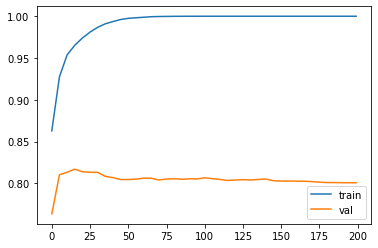

In [105]:
#plot auc on train & val
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

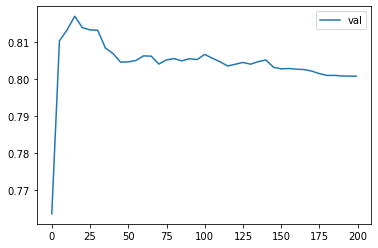

In [106]:
#only val
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [107]:
# this is how we trained the model with default parameters

## XGBoost parameter tuning
+ eta = learning rate

In [124]:
scores = {}

In [130]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth':6,
    'min_child_weight':1,
    
    'objective':'binary:logistic',
    'eval_metric':'auc',
    
    'nthread':8,
    'seed':1,
    'verbosity':1,
}

model = xgb.train(xgb_params, dtrain,
                  verbose_eval=5,
                  evals=watchlist,
                  num_boost_round=200)

In [131]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key]= parse_xgb_output(output)
key

'eta=0.1'

In [132]:
scores.keys()

dict_keys(['eta=0.3', 'eta=1.0', 'eta=0.1'])

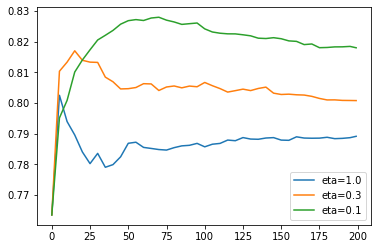

In [133]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1']
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()    

+ eta 1.0 is the worst

+ this is what eta or learning is about. We can how models learns by observing how large the steps are that the model takes with each new iteration

+ if the steps are too large then the model learns something fast and at some point starts to degrade because the steps are too large (orange).

+ but the green model needs more iterations till it becomes better. Even though it needs more iterations, it learns slower, it learns better. When it starts degrading, it doesn't happen too fast.

**0.1 is the best eta parameter here**

**tuning order -> eta -> max_depth -> min_child_weight**

*Tuning max_depth parameter*

In [135]:
#reset the scores
scores = {}

In [142]:
%%capture output

xgb_params = {
    'eta': 0.1,  # take the best eta
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [143]:
# our baseline for max_depth
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [144]:
scores.keys()

dict_keys(['max_depth=6', 'max_depth=3', 'max_depth=4', 'max_depth=10'])

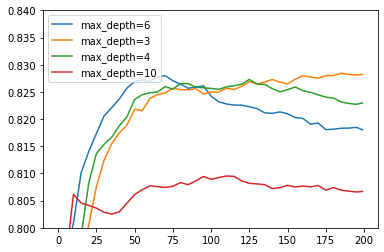

In [145]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend() 

max_depth = 10 is the worst. It achieves good scores before other values but then the performance after 10 stagnates

In [146]:
# deleting max_depth = 10 and plotting others
del scores['max_depth=10']

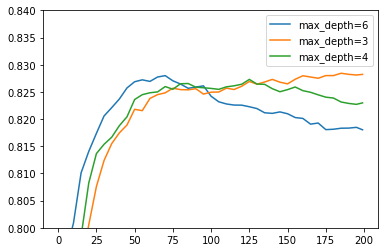

In [147]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.84)
plt.legend() 

**we see that orange model with max_depth = 3 even though it learns slower but it learns the best**

*tuning min_child_weight*

In [155]:
scores = {}

In [160]:
%%capture output

xgb_params = {
    'eta': 0.1,  # take the best eta
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [161]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

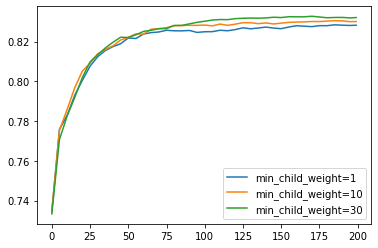

In [162]:
for min_child_weigh, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weigh)

plt.legend() 

+ Other useful XGBoost parameters:
+ subsamples and colsample_bytree
+ lambda & alpha

### Final XGBoost model

In [163]:
# these values did not make much of the difference
# use final values and train the model

xgb_params = {
    'eta': 0.1,  # take the best eta
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)


## Selecting final model
+ Choosing between xgboost, random forest, and decision tree

In [164]:
# final decision tree
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [167]:
# predictions/evaluation for decision tree
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.7687450049647622

In [165]:
# final random forest model

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [168]:
# predictions/evaluation for random forest
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val,y_pred)

0.8249709379767989

In [166]:
# fianl xgboost model
xgb_params = {
    'eta': 0.1,  # take the best eta
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [169]:
# predictions/evaluation for xgboost
y_pred = model.predict(dval)
roc_auc_score(y_val,y_pred)

0.8322969896587633

**Based on the auc score, xgboost has the best performance
now we will train the final model on the entire training set and evaluate the final model on test set**

In [170]:
df_full_train

status  seniority     home  time  age  marital records        job  \
3668       ok         22    owner    48   48  married      no      fixed   
2540  default          8    other    60   41  married      no  freelance   
279        ok          2  parents    36   19  married      no      fixed   
3536       ok          1    owner    12   61  married      no     others   
3866       ok         13    owner    60   27  married      no      fixed   
...       ...        ...      ...   ...  ...      ...     ...        ...   
332   default          4    owner    60   47  married      no  freelance   
1293       ok          2     rent    60   28   single      no      fixed   
4023       ok          2  parents    36   25   single      no      fixed   
3775       ok          4    other    60   25   single      no      fixed   
1945  default          1  parents    48   25   single      no  freelance   

      expenses  income   assets   debt  amount  price  
3668        60     110   3000.0    0.0    1000   1460  
2540        45      62      0.0    0.0    1800   2101  
279         35     162   4000.0  100.0     400    570  
3536        45     103  20000.0    0.0     300    650  
3866        35     253   7000.0    0.0    1060   1750  
...        ...     ...      ...    ...     ...    ...  
332         75       0  13500.0    0.0    1900   1976  
1293        45     101      0.0    0.0    1300   1333  
4023        35     110      0.0    0.0     500   1200  
3775        35     162      0.0    0.0    1800   2999  
1945        35       0      0.0    0.0    1800   1809  

[3563 rows x 14 columns]

In [171]:
df_full_train = df_full_train.reset_index(drop=True)

In [172]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [173]:
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [174]:
del df_full_train['status']

In [175]:
# tunring dictionaries into vectors
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

# we have y_test, we only need feature matrix here
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [176]:
# final model on training and test set

dfulltrain = xgb.DMatrix(X_full_train, label =y_full_train,
                        feature_names=dv.get_feature_names())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names()) # no features needed here

C:\Users\yadwi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [177]:
# final model

xgb_params ={
    'eta': 0.1,  # take the best eta
    'max_depth': 3,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=175)

In [178]:
# predictions
y_pred = model.predict(dtest)

In [179]:
roc_auc_score(y_test, y_pred) #this means model didn't overfit, it generalise quite well to unseen data

0.8219906162944137

## Summary

+ Decision trees are nodes with conditions. 
    + Decision nodes are leaves
    + they are prone to overfitting if the tree depth has not been restricted
    + parameter tuning is done by trying each possible thresholds for features. The impurity of the thresholds decides if it's the best or not

+ Random forest
    + combine multiple decision tress into one model
    + max_depth & min_sample_leaf are tuned and find the best values for them

+ Gradient boosting
    **Random forest train models in parallel while gradient boosting trains models sequentially**
    + each tree tries to fix the mistake of previous tree
    + tune eta (learning rate-> how fast model is learning),max_depth & min_child_weight
    + XGBoost is an implementation of gradient boosting